In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [5]:
cluster_with_guastocavo_labels = pd.read_csv("20230101-20240101_real_time_clusters_filtered_guasto_cavo.csv")
train_df = pd.read_parquet("train_df_lp.parquet")
merge_train_df = pd.merge(train_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_train_df.set_index('cluster_id2', inplace=True)
val_df = pd.read_parquet("val_df_lp.parquet")
merge_val_df = pd.merge(val_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_val_df.set_index('cluster_id2', inplace=True)
test_df = pd.read_parquet("test_df_lp.parquet")
merge_test_df = pd.merge(test_df, cluster_with_guastocavo_labels, on='cluster_id2', how='left')
merge_test_df.set_index('cluster_id2', inplace=True)

In [6]:
# Caricare i dataset
# Separare le feature dalle etichette
X_train = merge_train_df.drop(columns=['GUASTO CAVO'])  
y_train = merge_train_df['GUASTO CAVO']

X_val = merge_val_df.drop(columns=['GUASTO CAVO'])
y_val = merge_val_df['GUASTO CAVO']

X_test = merge_test_df.drop(columns=['GUASTO CAVO'])
y_test = merge_test_df['GUASTO CAVO']

In [7]:
# Inizializzare e allenare il modello Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8387681159420289
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.30      0.39        97
        True       0.86      0.95      0.91       455

    accuracy                           0.84       552
   macro avg       0.72      0.63      0.65       552
weighted avg       0.81      0.84      0.82       552

Test Accuracy: 0.8083182640144665
Test Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.30      0.40       117
        True       0.83      0.94      0.89       436

    accuracy                           0.81       553
   macro avg       0.71      0.62      0.64       553
weighted avg       0.78      0.81      0.78       553



Validation Accuracy: 0.8369565217391305
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.19      0.29        97
        True       0.85      0.98      0.91       455

    accuracy                           0.84       552
   macro avg       0.73      0.58      0.60       552
weighted avg       0.81      0.84      0.80       552

Test Accuracy: 0.7884267631103075
Test Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.10      0.17       117
        True       0.80      0.97      0.88       436

    accuracy                           0.79       553
   macro avg       0.65      0.54      0.52       553
weighted avg       0.74      0.79      0.73       553



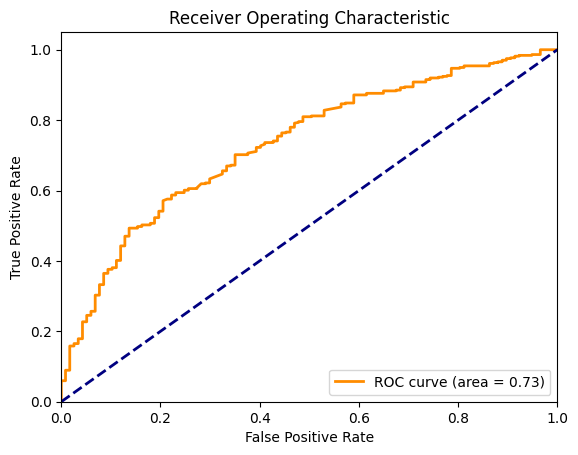

In [8]:
clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Tracciare la ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Inizializzare e allenare il modello SVM
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train.values.ravel())  # Assicurarsi che y_train sia un array 1D

# Valutare il modello sul set di validazione
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Valutare il modello sul set di test
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.8297101449275363
Validation Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.14      0.23        97
        True       0.84      0.98      0.90       455

    accuracy                           0.83       552
   macro avg       0.70      0.56      0.57       552
weighted avg       0.79      0.83      0.79       552

Test Accuracy: 0.7920433996383364
Test Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.08      0.14       117
        True       0.80      0.98      0.88       436

    accuracy                           0.79       553
   macro avg       0.68      0.53      0.51       553
weighted avg       0.75      0.79      0.72       553

